In [49]:
#Importlari tanimlama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [50]:
#Verisetini yukleme
data = pd.read_csv('Mall_Customers.csv')

In [51]:
#Verisetinin ilk satirlarini gosterme
data.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
#Veriseti hakkinda daha fazla bilgi alma
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Genre           200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
#Verisetinin istatistiksel ozeti
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [54]:
#Eksik deger kontrolu
print(data.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of      CustomerID  Genre    Age  Annual_Income  Spending_Score
0         False  False  False          False           False
1         False  False  False          False           False
2         False  False  False          False           False
3         False  False  False          False           False
4         False  False  False          False           False
..          ...    ...    ...            ...             ...
195       False  False  False          False           False
196       False  False  False          False           False
197       False  False  False          False           False
198       False  False  False          False           False
199       False  False  False          False           False

[200 rows x 5 columns]>


In [55]:
#Eksik degerleri doldurma-cikarma
data = data.dropna() #Eksik veri cikarma
data.fillna(0) #Eksik verilere '0' yaz

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


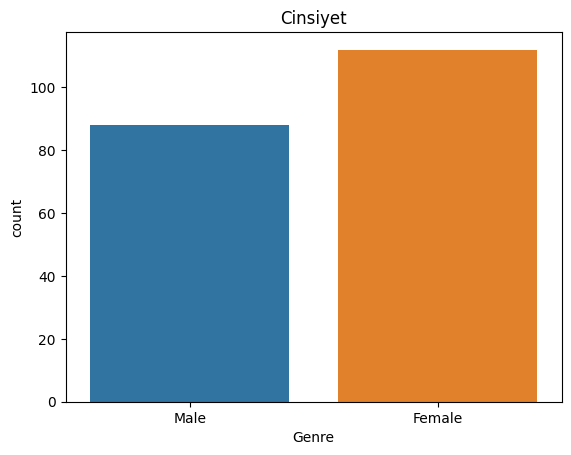

In [56]:
# 'Genre' verilerini gorsellestirme
sns.countplot(x = 'Genre', data = data)
plt.title('Cinsiyet')
plt.show()

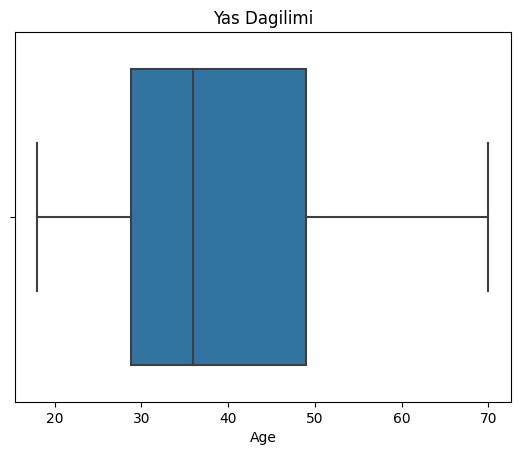

In [57]:
# 'Age' verilerini kutu grafigi ile gorsellestirme
sns.boxplot(x = 'Age', data =  data)
plt.title('Yas Dagilimi')
plt.show()

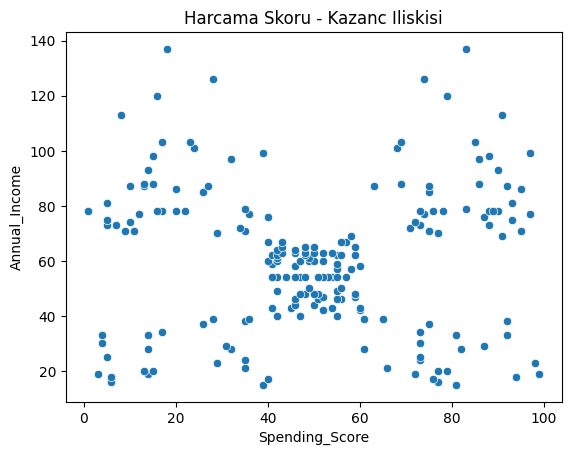

In [58]:
# 'Annual_Income_(k$)' ve 'Spending_Score_(1-100)' arasindaki iliskiyi gorsellestirme
sns.scatterplot(x = 'Spending_Score', y = 'Annual_Income',data = data)
plt.title('Harcama Skoru - Kazanc Iliskisi')
plt.show()

In [59]:
# Veriyi bagimsiz ve hedef degisken oalrak ikiye bolme
X = data.drop('Spending_Score',axis = 1)
Y = data['Spending_Score']

In [60]:
scaler = StandardScaler()
X_scaled = data.copy()
X_scaled['Age'] = scaler.fit_transform(X['Age'].values.reshape(-1,1))
print(X_scaled)

     CustomerID   Genre       Age  Annual_Income  Spending_Score
0             1    Male -1.424569             15              39
1             2    Male -1.281035             15              81
2             3  Female -1.352802             16               6
3             4  Female -1.137502             16              77
4             5  Female -0.563369             17              40
..          ...     ...       ...            ...             ...
195         196  Female -0.276302            120              79
196         197  Female  0.441365            126              28
197         198    Male -0.491602            126              74
198         199    Male -0.491602            137              18
199         200    Male -0.635135            137              83

[200 rows x 5 columns]
